# DATA 606 - CAPSTONE PROJECT

# A Study of Detecting COVID-19 Severity Using Lung Ultrasonography
### Team - Abdul Wahed, Amar Sayani, Bhargav Nishanth Katikey

## Abstract

The wide spread of COVID-19 has made the world's healthcare systems vulnerable, particularly in nations with poor health infrastructure. Wuhan, China, confirmed the first-ever case of COVID-19 in 2019. The virus impacts the body's respiratory organs, which causes difficulties in breathing, and affected individuals develop symptoms similar to pneumonia. The infection is identified using a real-time reverse transcriptase-polymerase chain reaction (RT-PCR) kit. The COVID-19 Coronavirus Real Time PCR Kit is an in vitro diagnostic test for qualitatively detecting nucleic acid from SARS-CoV-2 and is based on real-time fluorescence reverse transcription PCR technology. Due to an inadequate supply of kits and the expensive nature of the RT-PCR testing method, suspected patients cannot receive immediate medical attention, which allows the virus to multiply. Radiologists studied advances in radiographic imaging, such as CT scans, which generate detailed images of the body of outstanding quality, to devise an alternative. Deep learning techniques are utilized to differentiate between an unaffected individual and a COVID-19 patient based on a suspected patient's computed tomography (CT) image. Multiple deep learning techniques have been put forth for detecting COVID-19. This study used CNN architectures such as MobileNetV2, DenseNet121, basic CNN architecture, VGG16, and NASNet.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Pre-Processing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 2984 images belonging to 3 classes.
Found 185 images belonging to 3 classes.
Found 1166 images belonging to 3 classes.


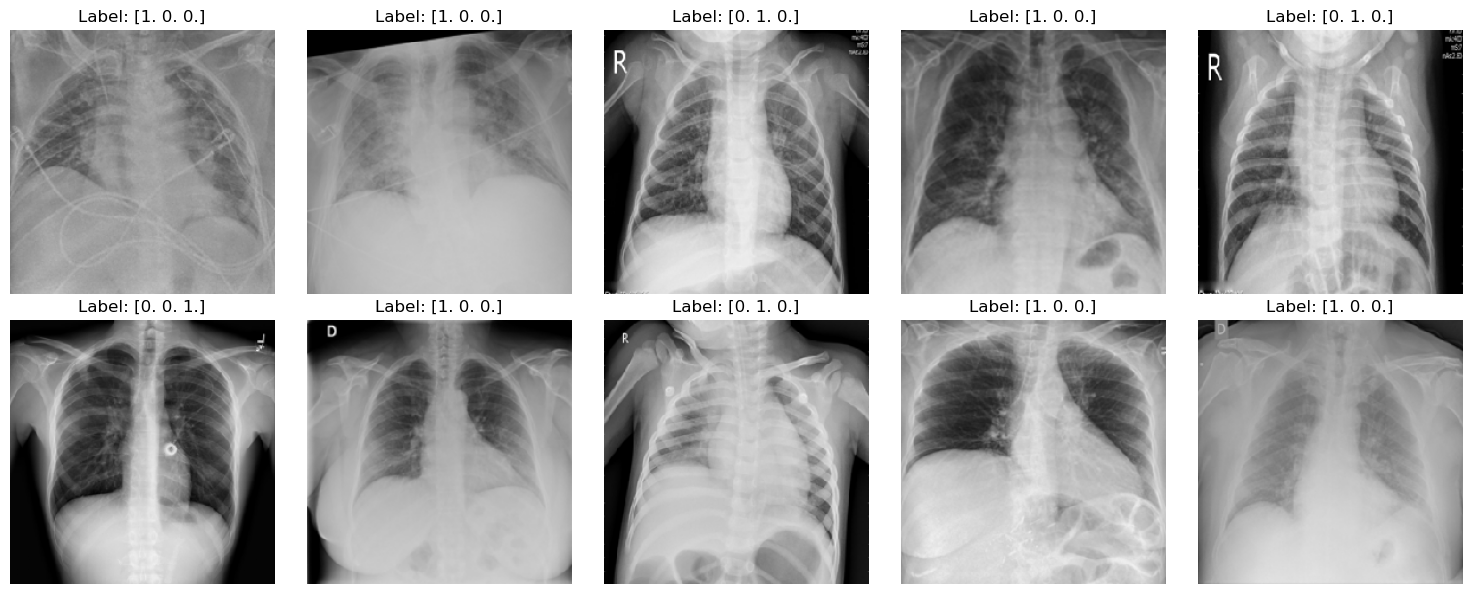

In [4]:
import matplotlib.pyplot as plt

# Get a batch of images from the validation dataset
images, labels = next(validation_generator)

# Plot the images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.tight_layout()
plt.show()

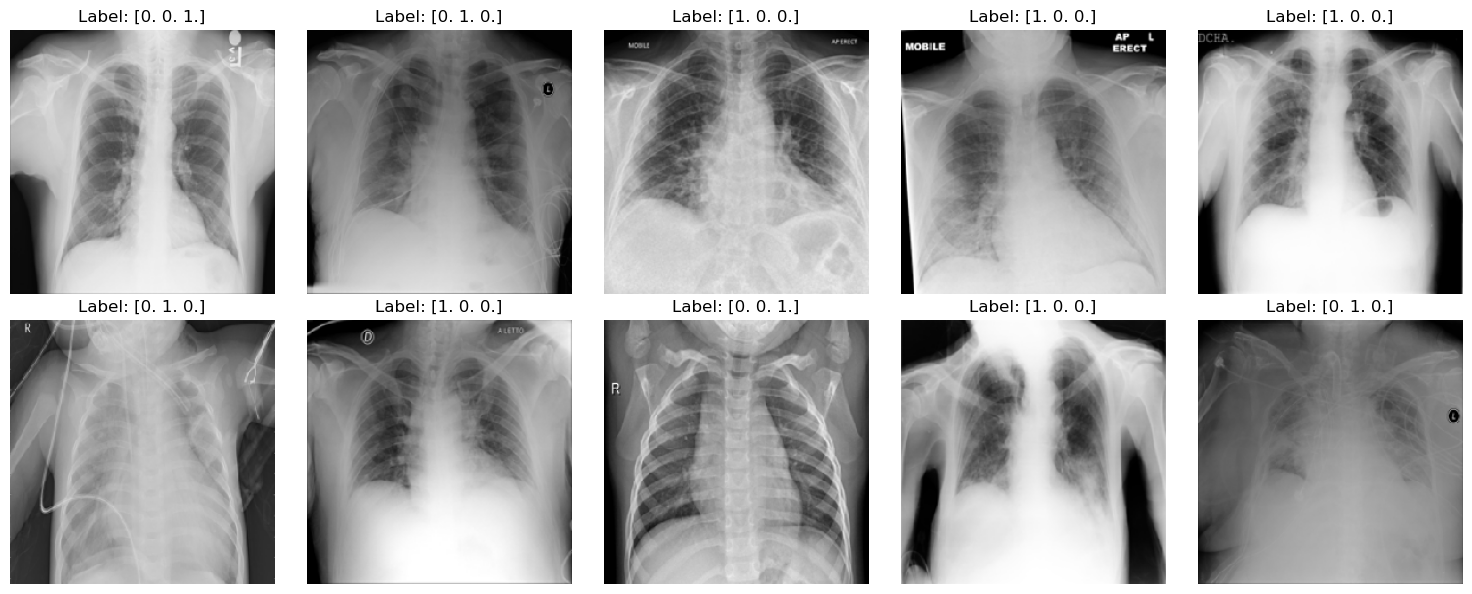

In [5]:
import matplotlib.pyplot as plt

# Get a batch of images from the training dataset
images, labels = next(train_generator)

# Plot the images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.tight_layout()
plt.show()

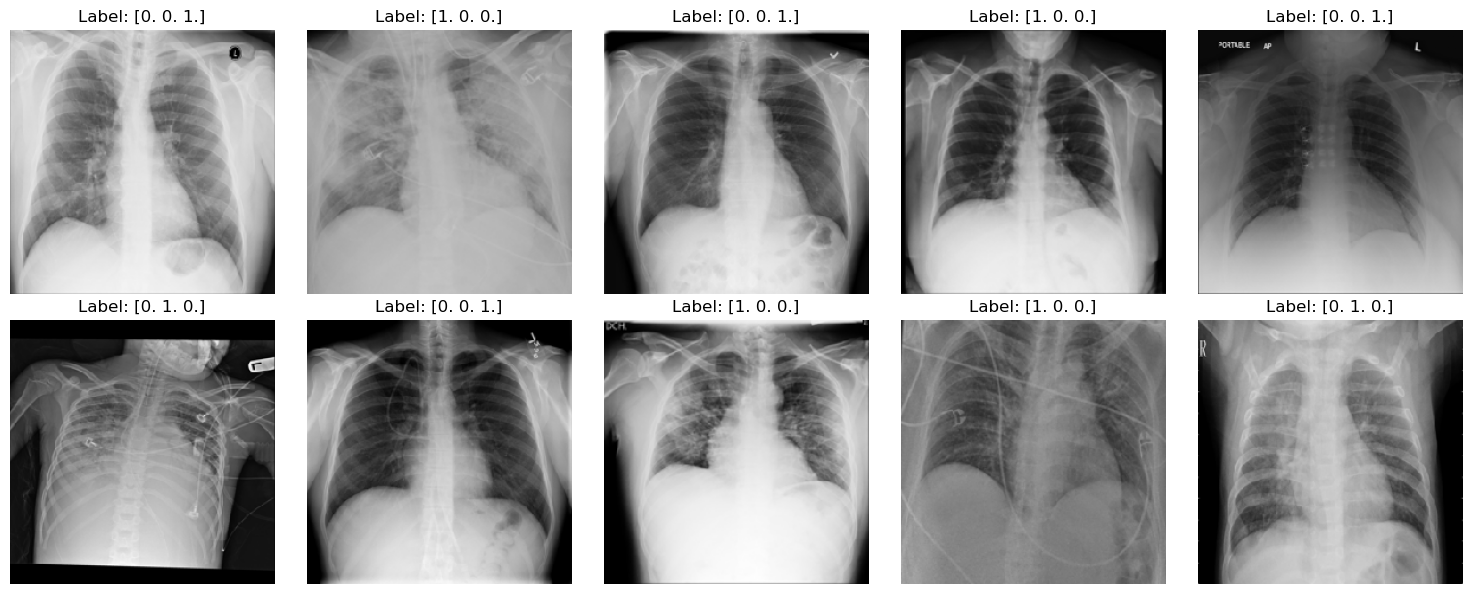

In [6]:
import matplotlib.pyplot as plt

# Get a batch of images from the test dataset
images, labels = next(test_generator)

# Plot the images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.tight_layout()
plt.show()

## CNN Architecture

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(128, (3, 3), activation='relu'))

# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 2D feature maps into a 1D feature vector
model.add(Flatten())

# Fully connected layer with 256 neurons and ReLU activation function
model.add(Dense(256, activation='relu'))

# Dropout layer with 0.5 probability to reduce overfitting
model.add(Dropout(0.5))

# Output layer with 3 neurons for 3 classes and softmax activation function
model.add(Dense(3, activation='softmax'))

**- Fitting the model on the data**

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.n // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.n // validation_generator.batch_size)

test_loss, test_acc, test_precision, test_recall = model.evaluate_generator(test_generator, verbose=1)

Epoch 1/10


C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\3976561693.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


93/93 [==============================] - 94s 1s/step - loss: 1.1396 - accuracy: 0.5718 - precision: 0.6464 - recall: 0.3747 - val_loss: 0.7050 - val_accuracy: 0.7250 - val_precision: 0.7910 - val_recall: 0.6625
Epoch 2/10
93/93 [==============================] - 96s 1s/step - loss: 0.7583 - accuracy: 0.6907 - precision: 0.7469 - recall: 0.5928 - val_loss: 0.6225 - val_accuracy: 0.7188 - val_precision: 0.7863 - val_recall: 0.6438
Epoch 3/10
93/93 [==============================] - 98s 1s/step - loss: 0.6502 - accuracy: 0.7358 - precision: 0.7907 - recall: 0.6653 - val_loss: 0.5314 - val_accuracy: 0.8062 - val_precision: 0.8529 - val_recall: 0.7250
Epoch 4/10
93/93 [==============================] - 98s 1s/step - loss: 0.5389 - accuracy: 0.7869 - precision: 0.8212 - recall: 0.7361 - val_loss: 0.5042 - val_accuracy: 0.7937 - val_precision: 0.8378 - val_recall: 0.7750
Epoch 5/10
93/93 [==============================] - 99s 1s/step - loss: 0.5148 - accuracy: 0.7923 - precision: 0.8295 - rec

C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\3976561693.py:12: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc, test_precision, test_recall = model.evaluate_generator(test_generator, verbose=1)


37/37 [==============================] - 7s 183ms/step - loss: 0.5822 - accuracy: 0.8165 - precision: 0.8311 - recall: 0.8019


**- Accuracy of the CNN Model**

In [9]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8164665699005127


**- Saving the model using h5**

In [10]:
model.save('Model/CNN.h5')

**- Plotting the graphs for Accuracy, Precision, Recall and loss**

C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_acc, 'b', color='blue', label='Training accuracy')
C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='orange', label='Validation accuracy')


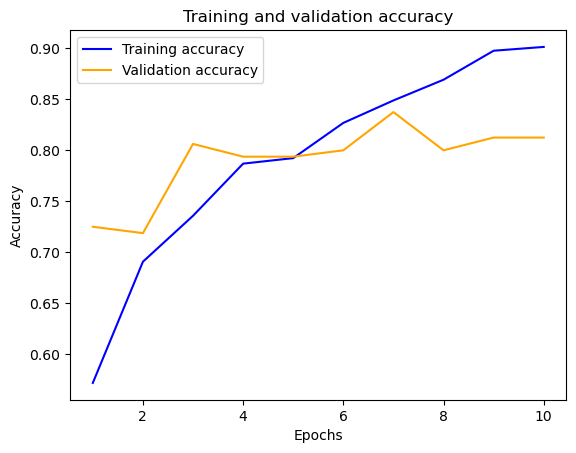

C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_precision, 'b', color='blue', label='Training precision')
C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_precision, 'b', color='orange', label='Validation precision')


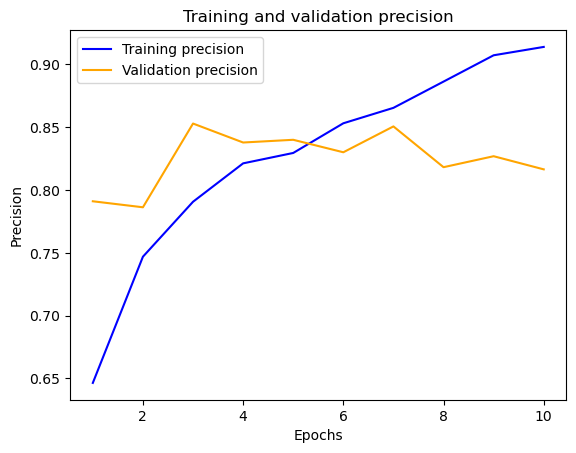

C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_recall, 'b', color='blue', label='Training recall')
C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_recall, 'b', color='orange', label='Validation recall')


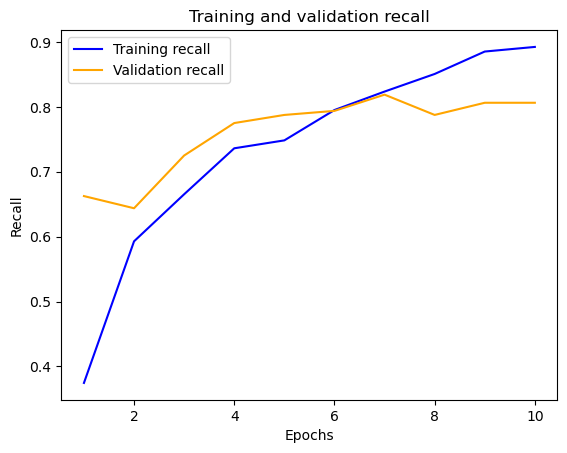

C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b', color='blue', label='Training loss')
C:\Users\nisha\AppData\Local\Temp\ipykernel_9176\6900016.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', color='orange', label='Validation loss')


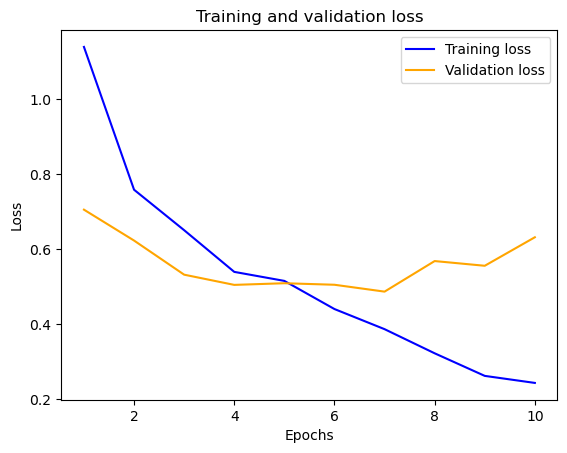

In [25]:
import matplotlib.pyplot as plt

# train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# train and validation precision
train_precision = history.history['precision']
val_precision = history.history['val_precision']

# train and validation recall
train_recall = history.history['recall']
val_recall = history.history['val_recall']

# train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# number of epochs
epochs = range(1, len(train_acc)+1)

# plot accuracy
plt.plot(epochs, train_acc, 'b', color='blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', color='orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot precision
plt.plot(epochs, train_precision, 'b', color='blue', label='Training precision')
plt.plot(epochs, val_precision, 'b', color='orange', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

# plot recall
plt.plot(epochs, train_recall, 'b', color='blue', label='Training recall')
plt.plot(epochs, val_recall, 'b', color='orange', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

# plot loss
plt.plot(epochs, train_loss, 'b', color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**- Plotting the Confusion Matrix**

37/37 [==============================] - 6s 158ms/step


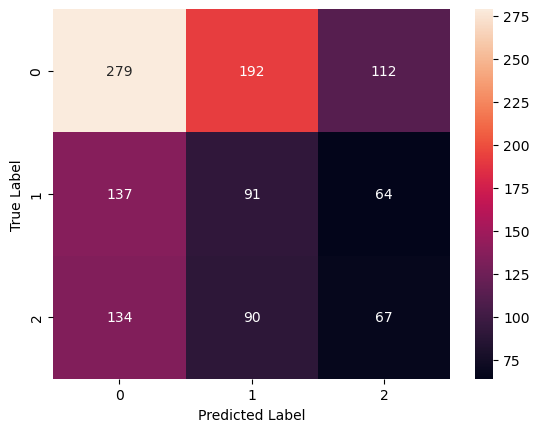

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predicted labels for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# get the true labels for the test data
y_true = test_generator.classes

# calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**- Checking the Classification Output**

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load the trained model
model = model

# define the class labels
class_labels = {2: 'Viral Pneumonia',1: 'COVID Negative', 0: 'COVID Positive'}

# function to preprocess the image
def preprocess_image(image_path):
    # load the image with target size of (150, 150)
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image_array = img_to_array(image)
    # expand the dimensions of the array to make it compatible with the model
    image_array = np.expand_dims(image_array, axis=0)
    # rescale the pixel values to between 0 and 1
    image_array /= 255.
    return image_array

# function to predict the class of an image
def predict_class(image_path):
    # preprocess the image
    image_array = preprocess_image(image_path)
    # make the prediction
    prediction = model.predict(image_array)
    # get the predicted class label
    predicted_class = np.argmax(prediction)
    # return the class label
    return class_labels[predicted_class]

# example usage
image_path = "C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png"
predicted_class = predict_class(image_path)
print('Predicted Class:', predicted_class)
plt.show()

1/1 [==============================] - 0s 32ms/step
Predicted Class: Viral Pneumonia


1/1 [==============================] - 0s 88ms/step


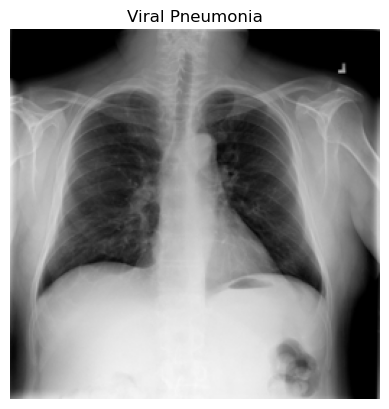

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('Model/CNN.h5')

# Define the image preprocessing function
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0) / 255.
    return img_array

# Define the prediction function
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Map the predicted class to the corresponding label
    if predicted_class == 0:
        label = 'COVID-19'
    elif predicted_class == 1:
        label = 'COVID-19 Negative'
    else:
        label = 'Viral Pneumonia'

    # Display the predicted image and its prediction
    img = tf.keras.preprocessing.image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

# Test the function with an example image
predict_image('C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png')


## MobileNetV2

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 3728 images belonging to 3 classes.
Found 932 images belonging to 3 classes.
Found 1166 images belonging to 3 classes.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name =    prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x
def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name = prefix +'dw_relu')(x)
    return x
def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters=out_channels,kernel_size = 1,   padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x
def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
       y = add([x,y])
    return y
def MobileNet(input_shape = (224,224,3), n_classes=3):
    input = Input (input_shape)
    x = Conv2D(32,3,strides=(2,2),padding='same', use_bias=False)(input)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name='conv1_relu')(x)
    # 17 Bottlenecks
    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=16,block_id=1)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 1,block_id = 3)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 2,block_id = 14)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 15)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 16)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 320, stride = 1,block_id = 17)
    x = Conv2D(filters = 1280,kernel_size = 1,padding='same',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)
    x = GlobalAveragePooling2D(name='global_average_pool')(x)
    output = Dense(n_classes,activation='softmax')(x)
    model = Model(input, output)
    return model
n_classes = 3
input_shape = (224,224,3)

model = MobileNet(input_shape,n_classes)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv2d_1[0][0]']               
                                )                                                           

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

**- Fitting the model on the data**

In [37]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))


C:\Users\nisha\AppData\Local\Temp\ipykernel_14156\3404571922.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
117/117 [==============================] - 278s 2s/step - loss: 0.9811 - accuracy: 0.5601 - precision_1: 0.6132 - recall_1: 0.4447 - val_loss: 1.3899 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 0.5000
Epoch 2/10
117/117 [==============================] - 253s 2s/step - loss: 0.8218 - accuracy: 0.6438 - precision_1: 0.6935 - recall_1: 0.5687 - val_loss: 2.0923 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 0.5000
Epoch 3/10
117/117 [==============================] - 257s 2s/step - loss: 0.7464 - accuracy: 0.6950 - precision_1: 0.7406 - recall_1: 0.6309 - val_loss: 2.0899 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 0.5000
Epoch 4/10
117/117 [==============================] - 255s 2s/step - loss: 0.6624 - accuracy: 0.7267 - precision_1: 0.7639 - recall_1: 0.6693 - val_loss: 2.3544 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 0.5000
Epoch 5/10
117/117 [==============================] - 255s 2s/step -

**- Evaluate the model on the test data**

In [39]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)

37/37 [==============================] - 12s 324ms/step - loss: 0.6235 - accuracy: 0.7804 - precision_1: 0.8052 - recall_1: 0.7659


**- Printing the test accuracy**

In [38]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8190394639968872


**- Save the model using h5**

In [45]:
model.save('Model/MobileNet.h5')

**- Plotting the graphs for Accuracy, Precision, Recall and loss**

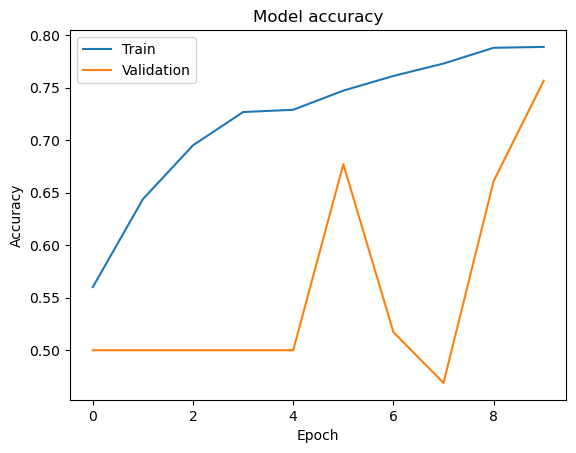

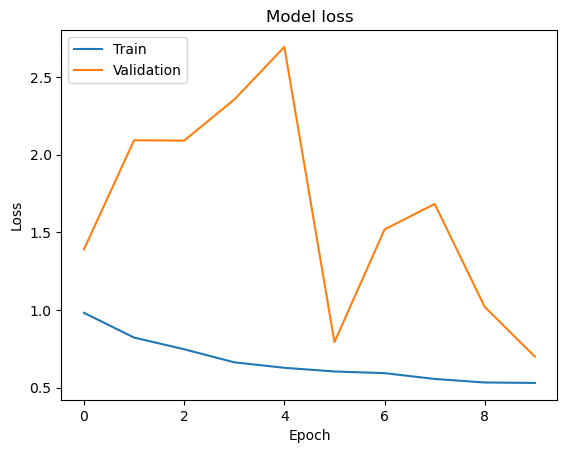

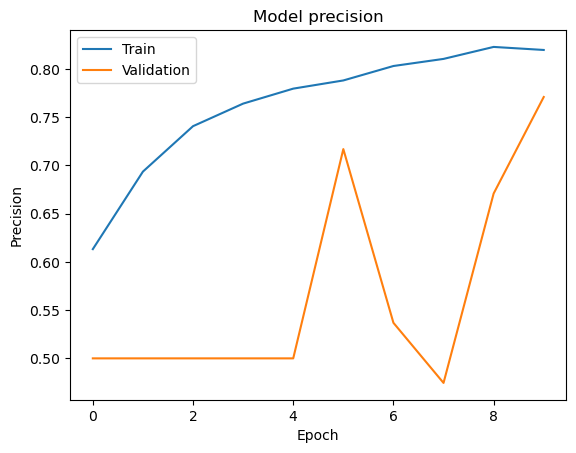

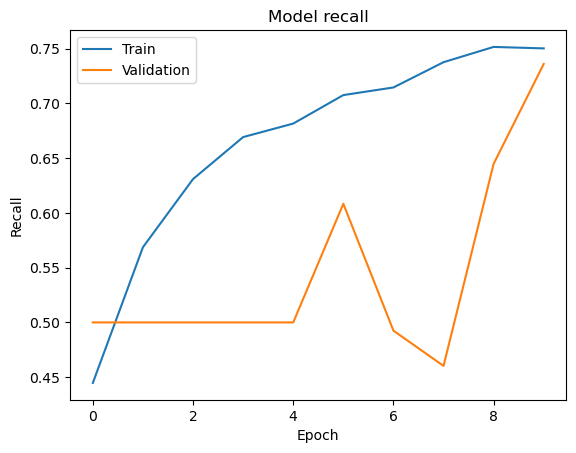

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training & validation accuracy values
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'])
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision values
plt.plot(np.arange(len(history.history['precision_1'])), history.history['precision_1'])
plt.plot(np.arange(len(history.history['val_precision_1'])), history.history['val_precision_1'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation recall values
plt.plot(np.arange(len(history.history['recall_1'])), history.history['recall_1'])
plt.plot(np.arange(len(history.history['val_recall_1'])), history.history['val_recall_1'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [43]:
from tensorflow.keras.models import load_model
model = load_model('Model/MobileNet.h5')

**- Plotting the Confusion Matrix**

37/37 [==============================] - 13s 322ms/step


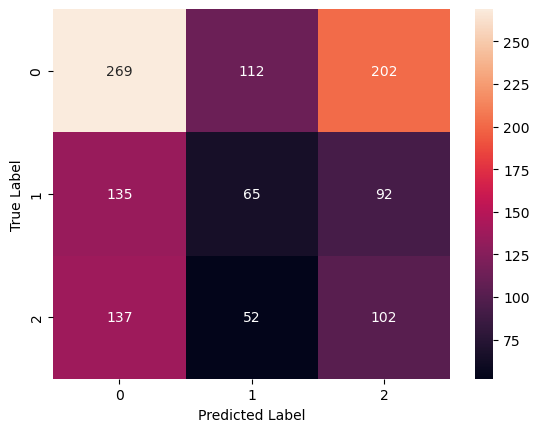

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predicted labels for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# get the true labels for the test data
y_true = test_generator.classes

# calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**- Checking the Classification Output**

In [49]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load the trained model
model = model

# define the class labels
class_labels = {2: 'Viral Pneumonia',1: 'COVID Negative', 0: 'COVID Positive'}

# function to preprocess the image
def preprocess_image(image_path):
    # load the image with target size of (150, 150)
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image_array = img_to_array(image)
    # expand the dimensions of the array to make it compatible with the model
    image_array = np.expand_dims(image_array, axis=0)
    # rescale the pixel values to between 0 and 1
    image_array /= 255.
    return image_array

# function to predict the class of an image
def predict_class(image_path):
    # preprocess the image
    image_array = preprocess_image(image_path)
    # make the prediction
    prediction = model.predict(image_array)
    # get the predicted class label
    predicted_class = np.argmax(prediction)
    # return the class label
    return class_labels[predicted_class]

# example usage
image_path = "C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png"
predicted_class = predict_class(image_path)
print('Predicted Class:', predicted_class)
plt.show()

1/1 [==============================] - 0s 37ms/step
Predicted Class: Viral Pneumonia


1/1 [==============================] - 0s 73ms/step


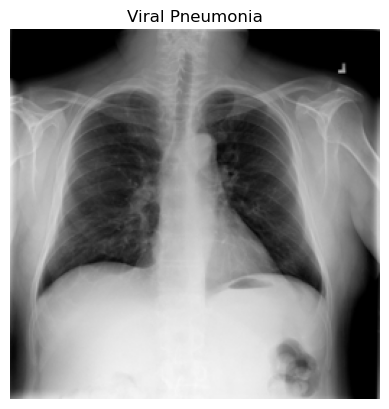

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('Model/CNN.h5')

# Define the image preprocessing function
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0) / 255.
    return img_array

# Define the prediction function
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Map the predicted class to the corresponding label
    if predicted_class == 0:
        label = 'COVID-19'
    elif predicted_class == 1:
        label = 'COVID-19 Negative'
    else:
        label = 'Viral Pneumonia'

    # Display the predicted image and its prediction
    img = tf.keras.preprocessing.image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

# Test the function with an example image
predict_image('C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png')


## DenseNET121

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 3728 images belonging to 3 classes.
Found 932 images belonging to 3 classes.
Found 1166 images belonging to 3 classes.


In [13]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Concatenate, BatchNormalization
from keras.regularizers import l2

def dense_block(x, n_layers, growth_rate, dropout_rate, weight_decay):
    for i in range(n_layers):
        bn = BatchNormalization()(x)
        relu = Activation('relu')(bn)
        conv = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(weight_decay))(relu)
        if dropout_rate:
            conv = Dropout(dropout_rate)(conv)
        x = Concatenate(axis=-1)([x, conv])
    return x

def transition_block(x, compression_factor, dropout_rate, weight_decay):
    n_channels = int(x.shape.as_list()[-1] * compression_factor)
    bn = BatchNormalization()(x)
    relu = Activation('relu')(bn)
    conv = Conv2D(n_channels, (1, 1), padding='same', kernel_regularizer=l2(weight_decay))(relu)
    if dropout_rate:
        conv = Dropout(dropout_rate)(conv)
    x = MaxPooling2D((2, 2))(conv)
    return x

def DenseNet121(input_shape=(224,224,3), n_classes=2, dropout_rate=0.0, weight_decay=1e-4, compression_factor=0.5):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_regularizer=l2(weight_decay))(inputs)
    bn1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(relu1)
    
    db1 = dense_block(pool1, 6, 32, dropout_rate, weight_decay)
    tb1 = transition_block(db1, compression_factor, dropout_rate, weight_decay)
    db2 = dense_block(tb1, 12, 32, dropout_rate, weight_decay)
    tb2 = transition_block(db2, compression_factor, dropout_rate, weight_decay)
    db3 = dense_block(tb2, 24, 32, dropout_rate, weight_decay)
    tb3 = transition_block(db3, compression_factor, dropout_rate, weight_decay)
    db4 = dense_block(tb3, 16, 32, dropout_rate, weight_decay)
    
    bn2 = BatchNormalization()(db4)
    relu2 = Activation('relu')(bn2)
    pool2 = GlobalAveragePooling2D()(relu2)
    
    outputs = Dense(n_classes, activation='softmax')(pool2)
    model = Model(inputs=inputs, outputs=outputs)
    
    return model


In [14]:
model1=DenseNet121()
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_49 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_49 (BatchN  (None, 112, 112, 64  256        ['conv2d_49[0][0]']              
 ormalization)                  )                                                           

**- Fitting the model on the data**

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
117/117 [==============================] - 569s 5s/step - loss: 0.9427 - accuracy: 0.5883 - precision: 0.6456 - recall: 0.4085 - val_loss: 3552.7380 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 2/10
117/117 [==============================] - 594s 5s/step - loss: 0.8887 - accuracy: 0.6183 - precision: 0.6821 - recall: 0.4928 - val_loss: 19.4002 - val_accuracy: 0.3455 - val_precision: 0.3442 - val_recall: 0.3391
Epoch 3/10
117/117 [==============================] - 564s 5s/step - loss: 0.8360 - accuracy: 0.6398 - precision: 0.6939 - recall: 0.5314 - val_loss: 2.4838 - val_accuracy: 0.4968 - val_precision: 0.5288 - val_recall: 0.3938
Epoch 4/10
117/117 [==============================] - 569s 5s/step - loss: 0.8524 - accuracy: 0.6312 - precision: 0.6963 - recall: 0.5086 - val_loss: 1.2571 - val_accuracy: 0.4893 - val_precision: 0.5163 - val_recall: 0.3745
Epoch 5/10
117/117 [==============================] - 578s 5s/step - loss: 0.8201 - accuracy: 0.

**- Evaluating the model on test data and printing thhe accuracy**

In [17]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

37/37 [==============================] - 28s 755ms/step - loss: 0.8837 - accuracy: 0.6286 - precision: 0.6485 - recall: 0.5918
Test accuracy: 0.6286449432373047


**- Evaluating the model on test data**

In [24]:
model.save('Model/DenseNet.h5')

**- Plotting the graphs for Accuracy, Precision, Recall and loss**

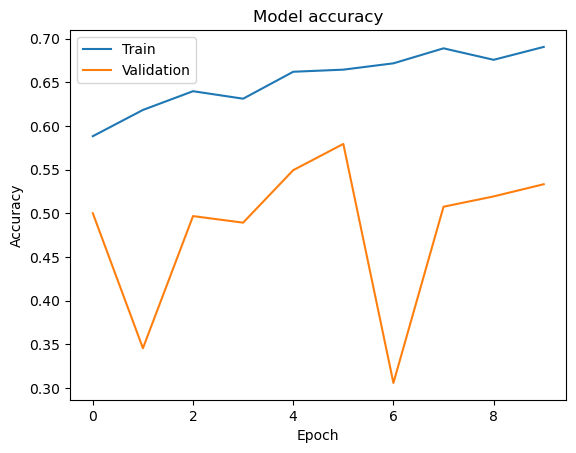

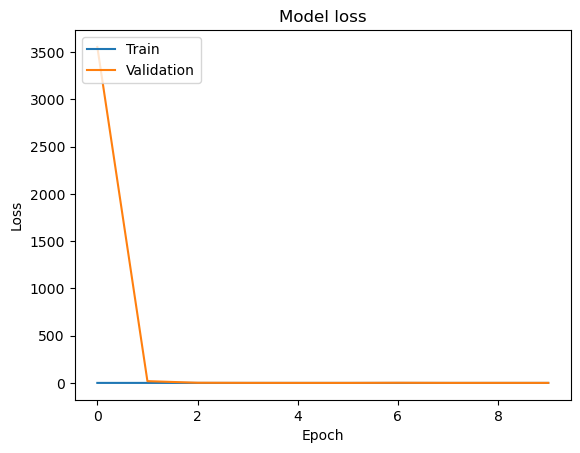

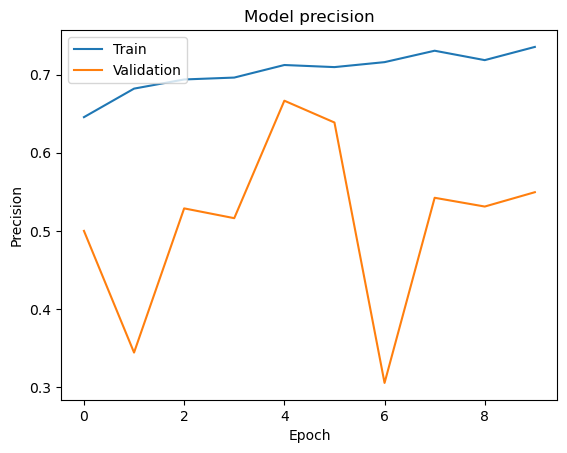

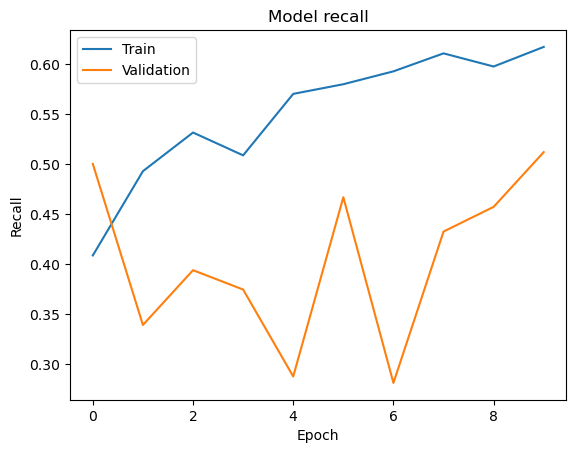

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training & validation accuracy values
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'])
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision values
plt.plot(np.arange(len(history.history['precision'])), history.history['precision'])
plt.plot(np.arange(len(history.history['val_precision'])), history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation recall values
plt.plot(np.arange(len(history.history['recall'])), history.history['recall'])
plt.plot(np.arange(len(history.history['val_recall'])), history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**- Plotting the Confusion Matrix**

37/37 [==============================] - 36s 930ms/step


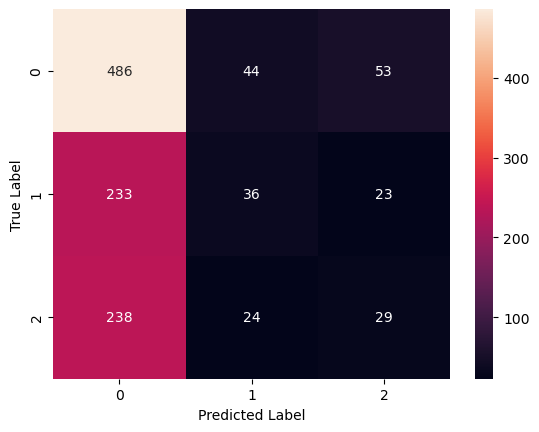

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predicted labels for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# get the true labels for the test data
y_true = test_generator.classes

# calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**- Checking the Classification Output**

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load the trained model
model = model

# define the class labels
class_labels = {2: 'Viral Pneumonia',1: 'COVID Negative', 0: 'COVID Positive'}

# function to preprocess the image
def preprocess_image(image_path):
    # load the image with target size of (150, 150)
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image_array = img_to_array(image)
    # expand the dimensions of the array to make it compatible with the model
    image_array = np.expand_dims(image_array, axis=0)
    # rescale the pixel values to between 0 and 1
    image_array /= 255.
    return image_array

# function to predict the class of an image
def predict_class(image_path):
    # preprocess the image
    image_array = preprocess_image(image_path)
    # make the prediction
    prediction = model.predict(image_array)
    # get the predicted class label
    predicted_class = np.argmax(prediction)
    # return the class label
    return class_labels[predicted_class]

# example usage
image_path = "C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png"
predicted_class = predict_class(image_path)
print('Predicted Class:', predicted_class)
plt.show()

1/1 [==============================] - 0s 86ms/step
Predicted Class: COVID Negative


1/1 [==============================] - 1s 662ms/step


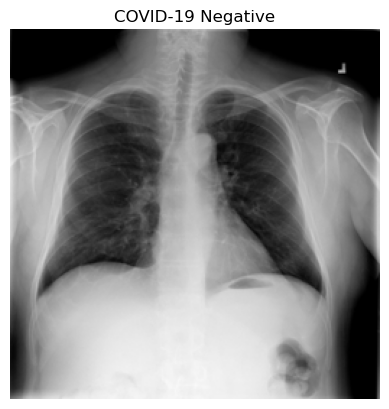

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('Model/DenseNet.h5')

# Define the image preprocessing function
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0) / 255.
    return img_array

# Define the prediction function
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Map the predicted class to the corresponding label
    if predicted_class == 0:
        label = 'COVID-19'
    elif predicted_class == 1:
        label = 'COVID-19 Negative'
    else:
        label = 'Viral Pneumonia'

    # Display the predicted image and its prediction
    img = tf.keras.preprocessing.image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

# Test the function with an example image
predict_image('C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png')


## VGG16

In [3]:
from keras import metrics


In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 3728 images belonging to 3 classes.
Found 932 images belonging to 3 classes.
Found 1166 images belonging to 3 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

# define input shape
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)

# load pre-trained VGG16 model without top layer
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# create a new model
model = Sequential()

# add VGG16 layers to new model
model.add(vgg16)

# flatten the output from VGG16
model.add(Flatten())

# add a dense layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# add an output layer with 3 neurons and softmax activation
model.add(Dense(3, activation='softmax'))

# print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_________________________________________________________________


**- Fit the model on the data**

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
117/117 [==============================] - 1215s 10s/step - loss: 2.1469 - accuracy: 0.4576 - precision: 0.4569 - recall: 0.1607 - val_loss: 1.0760 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
117/117 [==============================] - 3721s 32s/step - loss: 1.1691 - accuracy: 0.4928 - precision: 0.4930 - recall: 0.1226 - val_loss: 1.0261 - val_accuracy: 0.5011 - val_precision: 0.5881 - val_recall: 0.2758
Epoch 3/10
117/117 [==============================] - 1239s 11s/step - loss: 1.0242 - accuracy: 0.4987 - precision: 0.5670 - recall: 0.3122 - val_loss: 0.9764 - val_accuracy: 0.5558 - val_precision: 0.6674 - val_recall: 0.3380
Epoch 4/10
117/117 [==============================] - 1361s 12s/step - loss: 0.9842 - accuracy: 0.5365 - precision: 0.6206 - recall: 0.3712 - val_loss: 0.9198 - val_accuracy: 0.5848 - val_precision: 0.6622 - val_recall: 0.4732
Epoch 5/10
117/117 [==============================] - 1336s 11s/step - loss: 0.9985 

**- Evaluating the model on test data and printing thhe accuracy**

In [7]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

37/37 [==============================] - 95s 3s/step - loss: 0.8191 - accuracy: 0.6638 - precision: 0.7399 - recall: 0.4417
Test accuracy: 0.6638078689575195


**- Save the model using h5**

In [8]:
model.save('Model/VGG16.h5')

**- Plotting the graphs for Accuracy, Precision, Recall and loss**

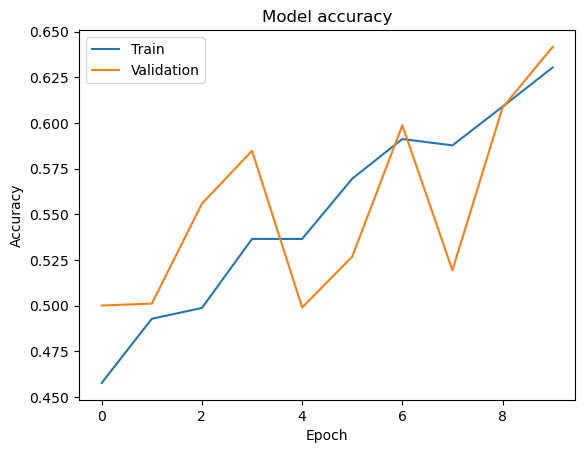

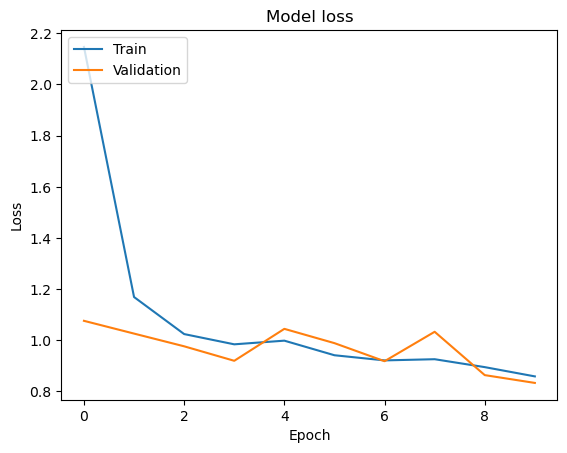

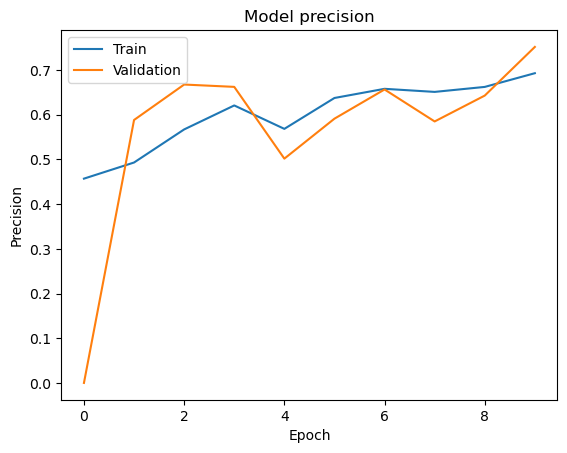

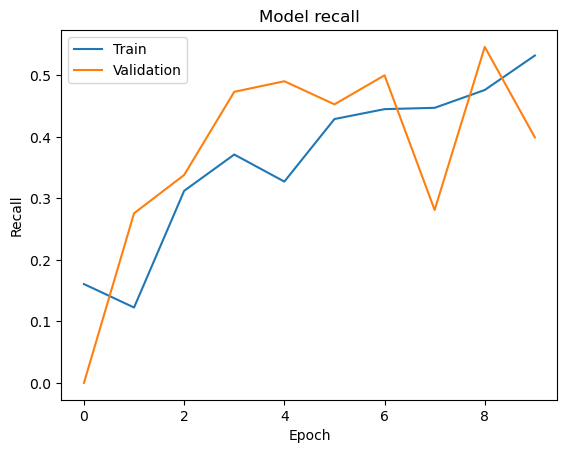

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training & validation accuracy values
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'])
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision values
plt.plot(np.arange(len(history.history['precision'])), history.history['precision'])
plt.plot(np.arange(len(history.history['val_precision'])), history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation recall values
plt.plot(np.arange(len(history.history['recall'])), history.history['recall'])
plt.plot(np.arange(len(history.history['val_recall'])), history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**- Plotting the Confusion Matrix**

37/37 [==============================] - 92s 3s/step


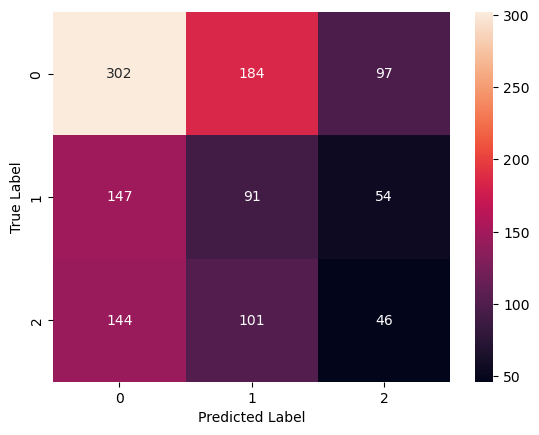

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predicted labels for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# get the true labels for the test data
y_true = test_generator.classes

# calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load the trained model
model = model

# define the class labels
class_labels = {2: 'Viral Pneumonia',1: 'COVID Negative', 0: 'COVID Positive'}

# function to preprocess the image
def preprocess_image(image_path):
    # load the image with target size of (150, 150)
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image_array = img_to_array(image)
    # expand the dimensions of the array to make it compatible with the model
    image_array = np.expand_dims(image_array, axis=0)
    # rescale the pixel values to between 0 and 1
    image_array /= 255.
    return image_array

# function to predict the class of an image
def predict_class(image_path):
    # preprocess the image
    image_array = preprocess_image(image_path)
    # make the prediction
    prediction = model.predict(image_array)
    # get the predicted class label
    predicted_class = np.argmax(prediction)
    # return the class label
    return class_labels[predicted_class]

# example usage
image_path = "C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png"
predicted_class = predict_class(image_path)
print('Predicted Class:', predicted_class)
plt.show()

1/1 [==============================] - 0s 34ms/step
Predicted Class: Viral Pneumonia


1/1 [==============================] - 0s 232ms/step


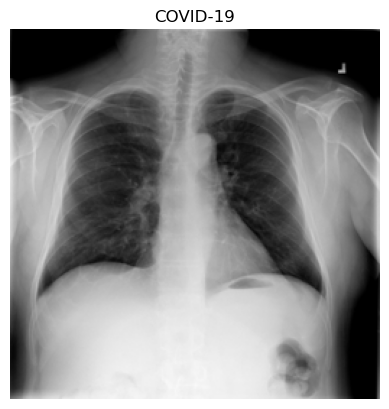

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('Model/VGG16.h5')

# Define the image preprocessing function
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0) / 255.
    return img_array

# Define the prediction function
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Map the predicted class to the corresponding label
    if predicted_class == 0:
        label = 'COVID-19'
    elif predicted_class == 1:
        label = 'COVID-19 Negative'
    else:
        label = 'Viral Pneumonia'

    # Display the predicted image and its prediction
    img = tf.keras.preprocessing.image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

# Test the function with an example image
predict_image('C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\Normal\\images\\Normal (100).png')


## NASNet

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 2984 images belonging to 3 classes.
Found 185 images belonging to 3 classes.
Found 1166 images belonging to 3 classes.


**- Define the model**

In [16]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import metrics

# Load the pre-trained NASNetLarge model
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Define the model with the pre-trained base and custom classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])


**- Fit the model on the data**

In [17]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/10


C:\Users\nisha\AppData\Local\Temp\ipykernel_14156\3677501039.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


93/93 [==============================] - 406s 4s/step - loss: 0.7922 - accuracy: 0.6657 - precision: 0.7106 - recall: 0.6030 - val_loss: 0.4692 - val_accuracy: 0.7875 - val_precision: 0.8593 - val_recall: 0.7250
Epoch 2/10
93/93 [==============================] - 386s 4s/step - loss: 0.5797 - accuracy: 0.7625 - precision: 0.8003 - recall: 0.7168 - val_loss: 0.4210 - val_accuracy: 0.8250 - val_precision: 0.8467 - val_recall: 0.7937
Epoch 3/10
93/93 [==============================] - 374s 4s/step - loss: 0.4546 - accuracy: 0.8133 - precision: 0.8435 - recall: 0.7835 - val_loss: 0.3255 - val_accuracy: 0.8687 - val_precision: 0.8758 - val_recall: 0.8375
Epoch 4/10
93/93 [==============================] - 372s 4s/step - loss: 0.4030 - accuracy: 0.8384 - precision: 0.8683 - recall: 0.8110 - val_loss: 0.3435 - val_accuracy: 0.8625 - val_precision: 0.8609 - val_recall: 0.8125
Epoch 5/10
93/93 [==============================] - 371s 4s/step - loss: 0.3671 - accuracy: 0.8537 - precision: 0.8763 

**- Evaluating the model on test data**

In [18]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

37/37 [==============================] - 134s 4s/step - loss: 0.5872 - accuracy: 0.8190 - precision: 0.8264 - recall: 0.8122
Test accuracy: 0.8190394639968872


**- Save the model using h5**

In [19]:
model.save('Model/NASNet.h5')

**- Plotting the graphs for Accuracy, Precision, Recall and loss**

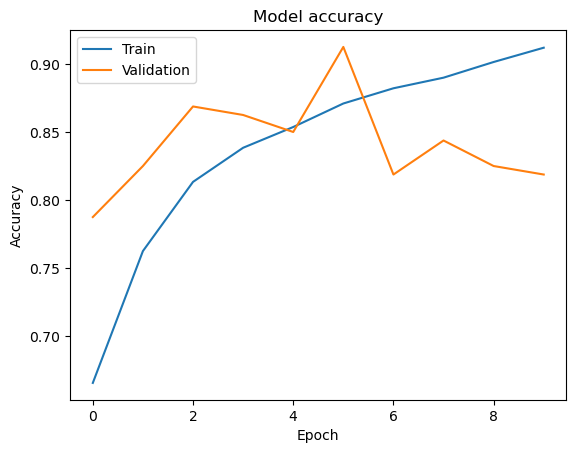

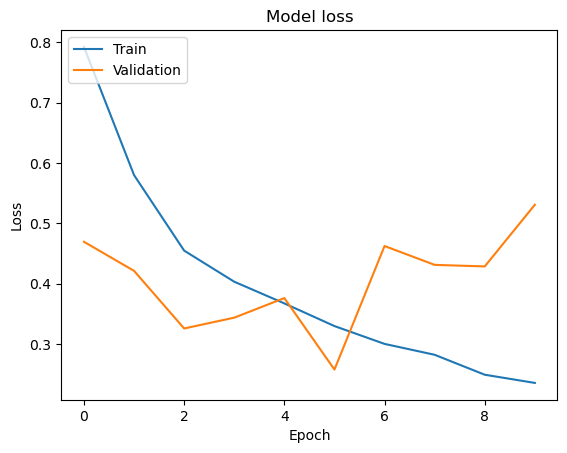

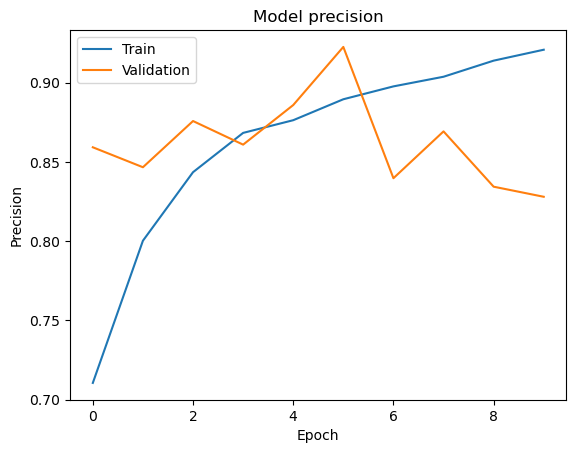

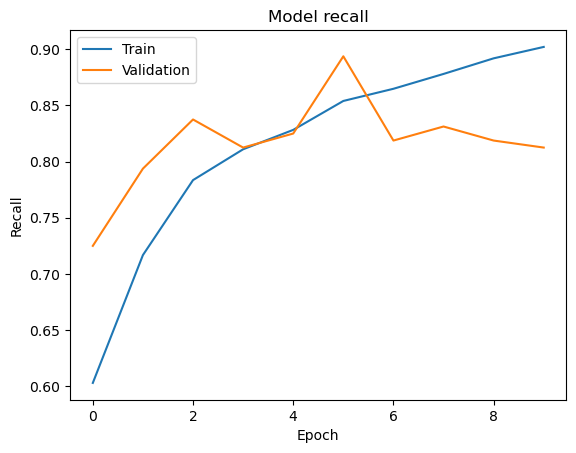

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training & validation accuracy values
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'])
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision values
plt.plot(np.arange(len(history.history['precision'])), history.history['precision'])
plt.plot(np.arange(len(history.history['val_precision'])), history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation recall values
plt.plot(np.arange(len(history.history['recall'])), history.history['recall'])
plt.plot(np.arange(len(history.history['val_recall'])), history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**- Plotting the Confusion Matrix**

37/37 [==============================] - 142s 4s/step


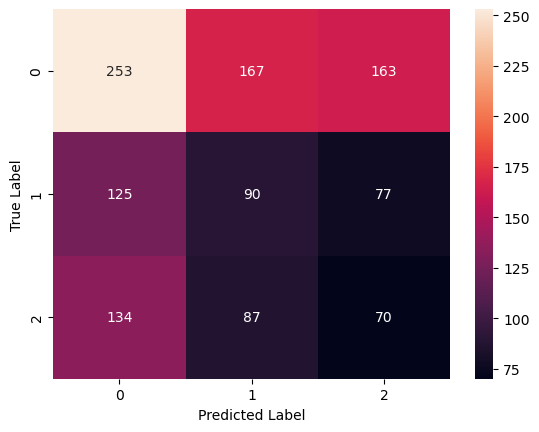

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predicted labels for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# get the true labels for the test data
y_true = test_generator.classes

# calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**- Checking the Classification Output**

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load the trained model
model = model

# define the class labels
class_labels = {2: 'Viral Pneumonia',1: 'COVID Negative', 0: 'COVID Positive'}

# function to preprocess the image
def preprocess_image(image_path):
    # load the image with target size of (150, 150)
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image_array = img_to_array(image)
    # expand the dimensions of the array to make it compatible with the model
    image_array = np.expand_dims(image_array, axis=0)
    # rescale the pixel values to between 0 and 1
    image_array /= 255.
    return image_array

# function to predict the class of an image
def predict_class(image_path):
    # preprocess the image
    image_array = preprocess_image(image_path)
    # make the prediction
    prediction = model.predict(image_array)
    # get the predicted class label
    predicted_class = np.argmax(prediction)
    # return the class label
    return class_labels[predicted_class]

# example usage
image_path = "C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\COVID-19\\images\\covid_1725.png"
predicted_class = predict_class(image_path)
print('Predicted Class:', predicted_class)
plt.show()

1/1 [==============================] - 0s 84ms/step
Predicted Class: COVID Positive


1/1 [==============================] - 0s 181ms/step


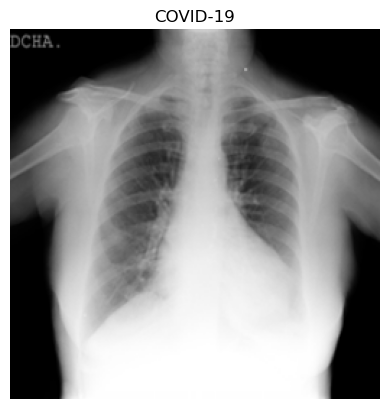

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('Model/VGG16.h5')

# Define the image preprocessing function
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0) / 255.
    return img_array

# Define the prediction function
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Map the predicted class to the corresponding label
    if predicted_class == 0:
        label = 'COVID-19'
    elif predicted_class == 1:
        label = 'COVID-19 Negative'
    else:
        label = 'Viral Pneumonia'

    # Display the predicted image and its prediction
    img = tf.keras.preprocessing.image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

# Test the function with an example image
predict_image('C:\\Users\\nisha\\OneDrive\\Desktop\\Data_covid_CT\\Test\\COVID-19\\images\\covid_1725.png')


## Conclusion 

This paper uncovers the prevailing and efficacious deep learning architectures used to identify COVID-19 in suspected patients by analyzing CT scan images. By exploring key concepts, these deep learning algorithms offer effective results in detecting the presence of COVID-19. The study utilizes the most notable models: CNN MobileNet, DenseNet, VGG16, and NASNet. However, specific measures need to be taken to enhance the accuracy of the suggested CNN models. These include incorporating a larger dataset, employing additional preprocessing techniques, and leveraging pre-trained models in transfer learning. The accuracy results for MobileNetV2 are 81.9%, DenseNet121 is 62.8%, Basic CNN is 81.6%, VGG16 is 66.3%, and NASNet is 81.9%. Among all the models, MobileNet and NASNet achieve the highest accuracy at 81.9%. Thus, the proposed system identifies MobileNet and NASNet as the optimal models for classifying CT scan images into COVID and non-COVID categories. However, a limitation of the study is its failure to identify COVID-affected lung areas. Further enhancements are necessary, including a larger dataset, additional preprocessing techniques, and the application of pre-trained models in transfer learning to improve the accuracy of the proposed CNN models. Additionally, future research may explore using the Yolo architecture to achieve even better accuracy. 

## GitHub: https://github.com/Nishanth9702/DATA-606-Capstone-Project